# Inverse Quantum Fourier Transform

In [54]:
import numpy as np
import qiskit as qi
import cmath
import math
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import transpile, execute
from qiskit.visualization import plot_histogram

Preparing the state:

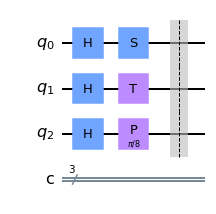

In [55]:
inv_qFT = qi.QuantumCircuit(3,3)
inv_qFT.h(0)
inv_qFT.h(1)
inv_qFT.h(2)
inv_qFT.s(0)
inv_qFT.t(1)
inv_qFT.p(np.pi/8,2)
inv_qFT.barrier()
inv_qFT.draw('mpl')

Applying the qFT inverse:

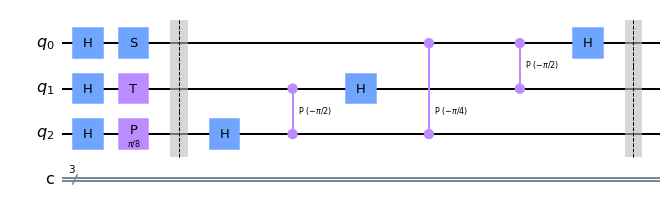

In [56]:
inv_qFT.h(2)
inv_qFT.cp(-np.pi/2,2,1)
inv_qFT.h(1)
inv_qFT.cp(-np.pi/4,2,0)
inv_qFT.cp(-np.pi/2, 1,0)
inv_qFT.h(0)
inv_qFT.barrier()
inv_qFT.draw('mpl')

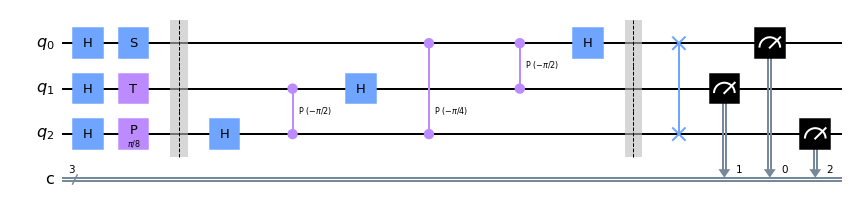

In [57]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

inv_qFT = swap_registers(inv_qFT,3)
inv_qFT.measure([0,1,2],[0,1,2])
inv_qFT.draw('mpl')

In [88]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(inv_qFT,backend=simulator, shots = 10000).result()
results = result.get_counts()
display(results)

{'000': 4092,
 '100': 4115,
 '011': 45,
 '010': 1383,
 '001': 310,
 '111': 10,
 '101': 45}

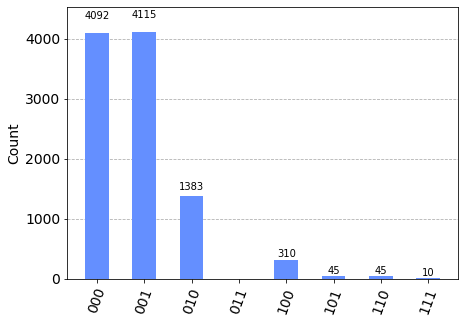

In [89]:
NQ_odering = {}
for q0 in range(2):
    for q1 in range(2):
        for q2 in range(2):
            myin = str(q2)+ str(q1) + str(q0)
            myout = str(q0) + str(q1) + str(q2)
            age = results.get(myin)
            if age:
                NQ_odering[myout] = results[myin]
            else:
                results[myin] = 0
                NQ_odering[myout] = results[myin]
plot_histogram(NQ_odering)